In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [5]:
fuel_econ['make'].value_counts()

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
Audi                 201
MINI                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Lotus                 10
Roush Performance     10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64

In [19]:
THRESHOLD = 80
idx = np.sum(make_frequency > THRESHOLD)
idx

18

In [7]:
most_makes = make_frequency.index[:idx]
most_makes

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'Audi', 'MINI',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [9]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
fuel_econ_sub['make'].value_counts()

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
MINI             201
Audi             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

In [10]:
make_means = fuel_econ_sub.groupby('make').mean()
make_means

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
make,,,,,,,,,,,,,,
Audi,35835.398010,2015.532338,5.512438,2.751741,25.781095,48.786070,20.426925,25.652045,29.389482,40.513205,23.639240,384.676617,5.432836,5.402985
BMW,35953.648184,2015.493308,5.973231,3.083748,35.441683,55.269598,19.862614,25.157074,28.649093,40.927519,23.004798,394.885277,5.221797,5.214149
Cadillac,36052.110169,2015.584746,5.474576,3.243220,24.398305,93.983051,18.845043,24.039474,26.939762,38.256114,21.773203,408.686441,4.915254,4.932203
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774
Dodge,35907.100000,2015.278571,6.285714,4.225714,32.228571,41.035714,18.516134,23.345414,27.948863,39.730484,21.812190,424.164286,4.878571,4.878571
Ford,36168.706422,2015.559633,4.770642,2.560092,19.977064,67.908257,24.015862,31.406761,31.864245,46.266219,26.796018,345.027523,6.261468,6.261468
Honda,36679.217822,2015.762376,4.297030,2.095050,48.108911,79.445545,28.459160,37.321850,36.852788,53.739881,31.588841,285.683168,7.396040,7.435644
Hyundai,35803.639241,2015.417722,4.481013,2.273418,9.765823,76.848101,25.746294,33.590951,33.917482,48.984818,28.793620,323.500000,6.759494,6.759494
Infiniti,36434.888889,2015.703704,5.962963,3.511111,20.861111,72.657407,20.366878,25.880562,27.471818,39.345459,23.002081,396.157407,5.175926,5.175926


In [11]:
comb_order = make_means.sort_values('comb', ascending = False).index
comb_order

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

In [15]:
fuel_econ_sub.comb.value_counts().sort_index()

13.8580    2
13.9049    1
13.9055    1
13.9976    2
14.1408    3
14.2712    1
14.4579    2
14.5439    1
15.0247    1
15.2156    1
15.2564    2
15.2654    6
15.2830    1
15.4405    2
15.4573    1
15.4684    3
15.5264    1
15.5514    1
15.5553    1
15.5580    1
15.5665    1
15.5775    2
15.6278    2
15.6601    1
15.6978    2
15.7288    1
15.7577    1
15.7784    1
15.8122    1
15.8363    2
          ..
43.6340    1
43.8792    2
44.0980    3
44.3466    1
46.1340    1
46.2351    1
46.2364    1
46.2506    1
46.3086    1
46.3689    2
46.6875    2
47.6621    1
47.6670    1
47.6804    1
47.8398    1
49.5173    1
49.5456    1
49.5553    1
49.5685    1
49.7021    3
51.7126    1
51.8149    1
52.0824    1
52.1147    1
52.3231    1
54.4329    2
54.5772    1
54.6019    1
55.7000    3
57.7824    2
Name: comb, Length: 1768, dtype: int64

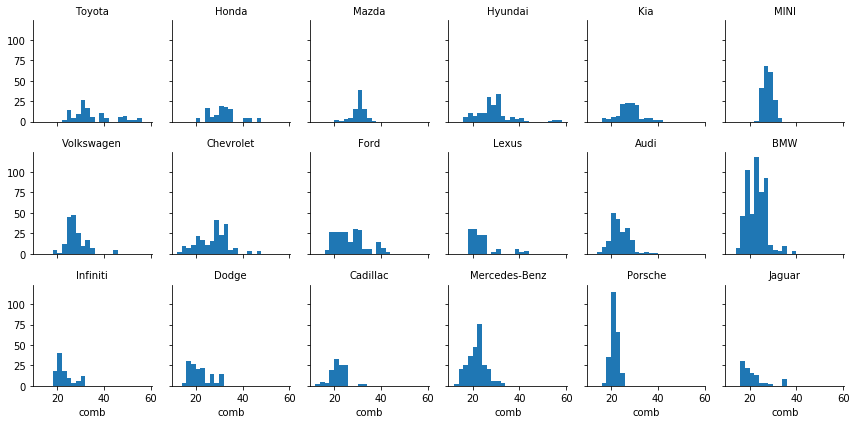

In [16]:
# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,
                     col_order = comb_order)
# try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')



Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


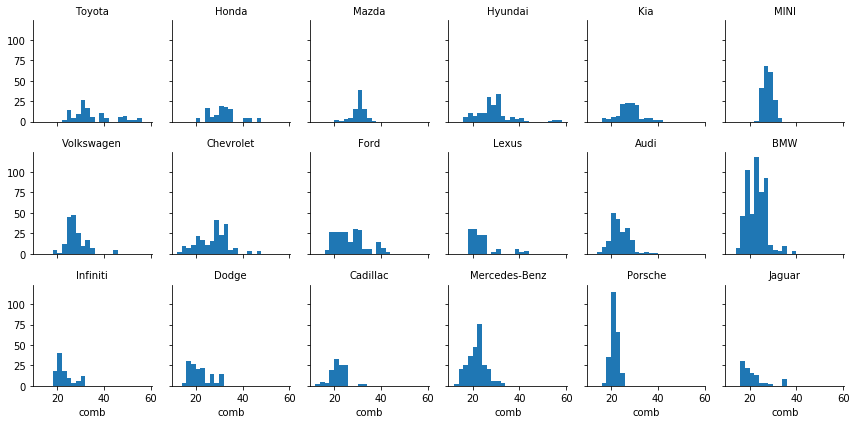

In [3]:
# run this cell to check your work against ours
additionalplot_solution_1()

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

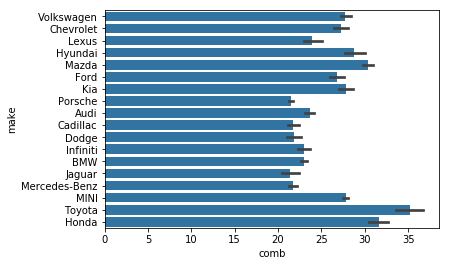

In [24]:
# YOUR CODE HERE
base_color=sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x='comb', y = 'make', color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')
# try sb.distplot instead of plt.hist to see the plot in terms of density!
#g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
#g.set_titles('{col_name}')


# plotting
    base_color = sb.color_palette()[0]
    sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
               color = base_color, order = comb_order, ci = 'sd')
    plt.xlabel('Average Combined Fuel Eff. (mpg)')

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


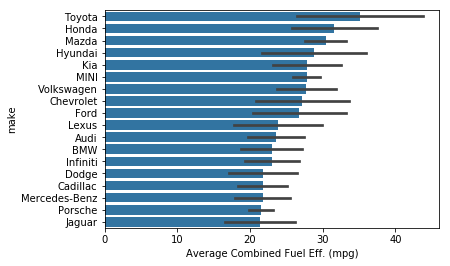

In [20]:
# run this cell to check your work against ours
additionalplot_solution_2()